In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Screening Autism Based on Behavioral tests from Adults

This project examins effectiveness of behavioral screening to detect possible autism cases from adult patients. The dataset contains test results from the 10 differnt behavioral features and 10 individual characteristics that have proved to be effective in detecting the ASD cases. Behavioral and characteristics are indivudally analyzed to compare the effectiveness. 

In [2]:
# load data into a dataframe and examin
df = pd.read_csv(r'C:\Users\HanSoul\Documents\analysis\datas\Autism_Adult_Data\Autism_Adult_Data.csv')
print("*******Dataframe Keys*******")
print(df.keys())
print("*******Dataframe Shape*******")
print(df.shape)
print("*******Dataframe Head*******")
print(df.head())


*******Dataframe Keys*******
Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
*******Dataframe Shape*******
(704, 22)
*******Dataframe Head*******
   id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         1         1         0         0         1   
1   2         1         1         0         1         0         0         0   
2   3         1         1         0         1         1         0         1   
3   4         1         1         0         1         0         0         1   
4   5         1         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jundice austim  \
0         1         0  ...       f  White-Euro

In [3]:
df.loc[1,]

id                           2
A1_Score                     1
A2_Score                     1
A3_Score                     0
A4_Score                     1
A5_Score                     0
A6_Score                     0
A7_Score                     0
A8_Score                     1
A9_Score                     0
A10_Score                    1
age                         24
gender                       m
ethnicity               Latino
jundice                     no
austim                     yes
contry_of_res           Brazil
used_app_before             no
result                       5
age_desc           18 and more
relation                  Self
Class/ASD                   NO
Name: 1, dtype: object

There are several features that appears to be irrelevant. age_desc looks like a pure description and result looks like sum of all the test scores. 

In [4]:
df['age_desc'].astype("category")

0      18 and more
1      18 and more
2      18 and more
3      18 and more
4      18 and more
          ...     
699    18 and more
700    18 and more
701    18 and more
702    18 and more
703    18 and more
Name: age_desc, Length: 704, dtype: category
Categories (1, object): ['18 and more']

In [5]:
result_loc = df.columns.get_loc("result")
result_diff = 0  
for i in range(0, 703):
    val_sum = 0
    for j in range(1,10,1):
        val = df.iloc[i,j]
        val_sum = val_sum + val
    val_result = df.iloc[i,result_loc]    
    
    if val_result is val_sum:
        continue
    else:
        val_sum = val_sum + 1
        
if result_diff is 0:
    print('result column is the sum of test scores')
else:
    print('result column is not the sum of test scores: ')
    print(result_diff)

result column is the sum of test scores


Turns out age_desc column contains a same value and result column is a sum of the test scores. They are dropped from the dataframe to prepare the test and training dataset for now. result might later be examined. 

In [6]:
df = df.drop(['age_desc', 'result'], axis = 1)

In [7]:
col_names = df.keys()
print(col_names)
for i in col_names:
    print("*****************")
    print(i)
    print(df[i].value_counts())


Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation', 'Class/ASD'],
      dtype='object')
*****************
id
1      1
2      1
465    1
466    1
467    1
      ..
237    1
238    1
239    1
240    1
704    1
Name: id, Length: 704, dtype: int64
*****************
A1_Score
1    508
0    196
Name: A1_Score, dtype: int64
*****************
A2_Score
0    385
1    319
Name: A2_Score, dtype: int64
*****************
A3_Score
0    382
1    322
Name: A3_Score, dtype: int64
*****************
A4_Score
0    355
1    349
Name: A4_Score, dtype: int64
*****************
A5_Score
0    353
1    351
Name: A5_Score, dtype: int64
*****************
A6_Score
0    504
1    200
Name: A6_Score, dtype: int64
*****************
A7_Score
0    410
1    294
Name: A7_Score, dtype: int64
*****************
A8_Score
1    457


Seems like there are some missing values in age, ethnicity, and relation column. Unlike other columns age is a quantitative column. We will examin those 2 rows with the missing age values and remove if needed. The age column also contains value 383, which is likely an error.

In [8]:
df.loc[df['age'] == '?']

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
62,63,0,0,0,0,0,0,0,0,0,0,?,m,?,no,no,Saudi Arabia,no,?,NO
91,92,0,1,0,0,1,0,1,0,0,1,?,f,?,no,no,Jordan,no,?,NO


In [9]:
df.loc[df['age'] == '383']

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
52,53,1,0,0,0,0,0,0,0,0,0,383,f,Pasifika,no,no,New Zealand,no,Self,NO


In [10]:
df_eth_miss = df.loc[df['ethnicity'] == '?']
df_eth_miss['relation'].astype("category")


4      ?
12     ?
13     ?
14     ?
19     ?
      ..
652    ?
658    ?
659    ?
666    ?
701    ?
Name: relation, Length: 95, dtype: category
Categories (1, object): ['?']

The rows with missing age values are missing both ethnicity and relation values. Rows with missing ethinicity values are also missing relation values. Since the test and character variables will split into seperate dataframes, the rows with missing values will be removed from the character dataframe. 

In [11]:
df_tests = df[['A1_Score', 
            'A2_Score', 
            'A3_Score', 
            'A4_Score', 
            'A5_Score',
            'A6_Score', 
            'A7_Score', 
            'A8_Score', 
            'A9_Score', 
            'A10_Score', 
            'Class/ASD']]

df_characters = df[['age',
                'gender', 
                'ethnicity', 
                'jundice', 
                'austim', 
                'contry_of_res',
                'used_app_before', 
                'relation',
                'Class/ASD']]

df_characters = df_characters[df_characters.ethnicity != '?']
df_characters = df_characters[ df_characters.age != '383' ]


df_characters['age'].value_counts()
col_names = df_characters.keys()
print(col_names)
for i in col_names:
    print("*****************")
    print(i)
    print(df_characters[i].value_counts())


Index(['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation', 'Class/ASD'],
      dtype='object')
*****************
age
22    33
23    33
21    32
24    31
20    31
18    31
27    29
30    27
25    26
29    26
26    25
19    24
28    22
31    19
35    17
33    15
40    15
37    15
42    15
32    14
17    14
36    13
38    11
34    11
43     9
44     9
39     7
55     6
53     6
47     6
46     6
50     4
48     4
45     3
49     3
52     3
41     2
61     2
58     2
54     2
64     1
59     1
51     1
56     1
60     1
Name: age, dtype: int64
*****************
gender
m    321
f    287
Name: gender, dtype: int64
*****************
ethnicity
White-European     233
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: ethnicity, dtype: int64
*****************
j

The missing values have been removed from df_character. Data cleaning is now complete. 

# Classification using KNeighborsClassifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Could behavioral traits detect autism?

(704,)
(704, 10)


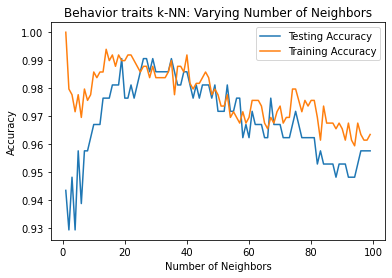

In [13]:
y = df_tests['Class/ASD']
X = df_tests.drop(['Class/ASD'], axis = 1)

print(y.shape)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('Behavior traits k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Turns out behavioral traits can be 99 percent accurate to predict autism among adults. Could characteristics result in comparable prediction?

## Could character traits detect autism?

(608,)
(608, 8)


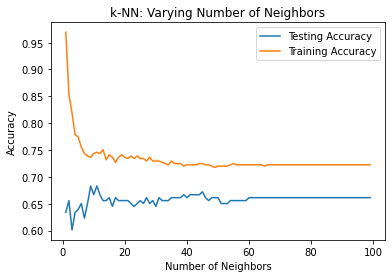

In [14]:
from sklearn import preprocessing

y = df_characters['Class/ASD']
X = df_characters.drop(['Class/ASD'], axis = 1)

# Categorial features need to be converted into integers to use KNeighborsClassifier
# Create an instance of LabelEncoder

le = preprocessing.LabelEncoder()

col_names = X.keys()
for i in col_names:
    if i is 'age':
        continue
    else:
        X[i]= le.fit_transform(X[i])

        
print(y.shape)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Unlike the behavioral trail the characteristics can predict autism approximately upto 70 percent. Therefore, behavioral traits are suprior for detecting autism.

# Correlations between autism and features

## Behavioral traits

Text(0.5, 1.0, 'With ASD: Test Score Distribution')

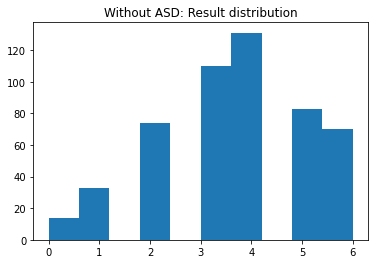

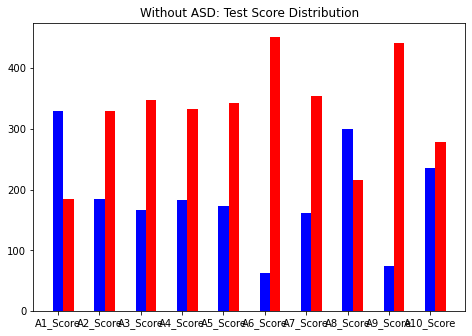

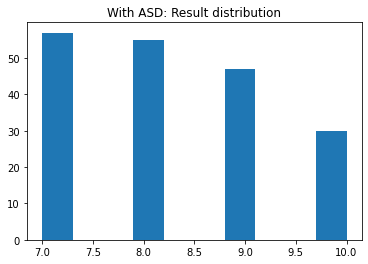

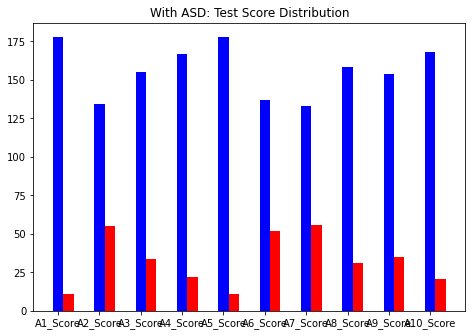

In [15]:
# Reload the datafile
df = pd.read_csv(r'C:\Users\HanSoul\Documents\analysis\datas\Autism_Adult_Data\Autism_Adult_Data.csv')


df_behave = df[['A1_Score', 
            'A2_Score', 
            'A3_Score', 
            'A4_Score', 
            'A5_Score',
            'A6_Score', 
            'A7_Score', 
            'A8_Score', 
            'A9_Score', 
            'A10_Score', 
            'result',
               'Class/ASD']]
df_behave=df_behave.rename(columns = {'Class/ASD':'ASD'})

####################Subjects without ASD
df_No = df_behave[(df_behave.ASD == 'NO')]
df_No_result = df_No['result']
df_No = df_No.drop(['ASD', 'result'], axis = 1)

No_1 = []
No_0 = []
df_colname = df_No.keys()

for i in df_colname:
    val = df_No[i].value_counts()
    No_0.append(val[0])
    No_1.append(val[1])

plt.figure()
plt.hist(df_No_result)
plt.title("Without ASD: Result distribution")

X_0 = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_0 + 0.00, No_1, color = 'b', width = 0.25)
ax.bar(X_0 + 0.25, No_0, color = 'r', width = 0.25)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(df_colname)
ax.set_title("Without ASD: Test Score Distribution")

####################Subjects with ASD

df_Yes = df_behave[(df_behave.ASD == 'YES')]
df_Yes_result = df_Yes['result']
df_Yes = df_Yes.drop(['ASD', 'result'], axis = 1)

Yes_1 = []
Yes_0 = []
df_colname = df_Yes.keys()

for i in df_colname:
    val = df_Yes[i].value_counts()
    Yes_0.append(val[0])
    Yes_1.append(val[1])

plt.figure()
plt.hist(df_Yes_result)
plt.title("With ASD: Result distribution")    
    
X_0 = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_0 + 0.00, Yes_1, color = 'b', width = 0.25)
ax.bar(X_0 + 0.25, Yes_0, color = 'r', width = 0.25)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(df_colname)
ax.set_title("With ASD: Test Score Distribution")

## Characteristic traits

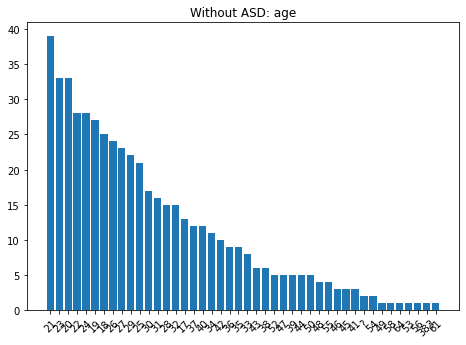

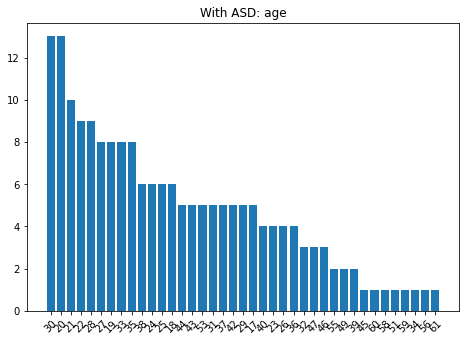

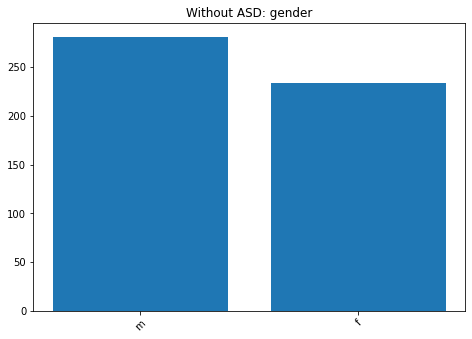

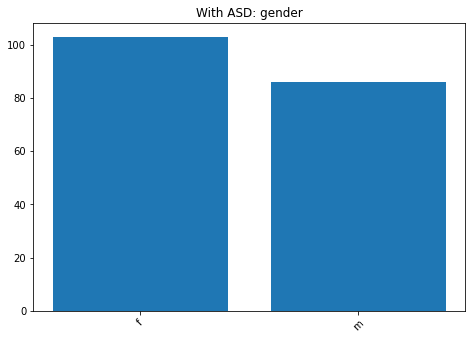

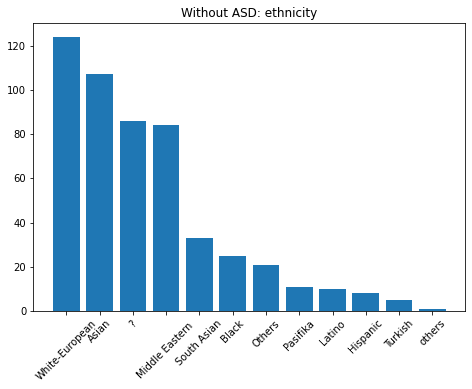

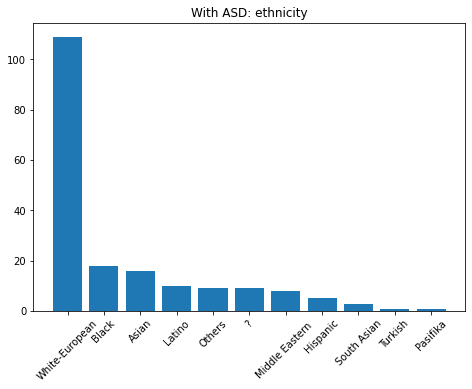

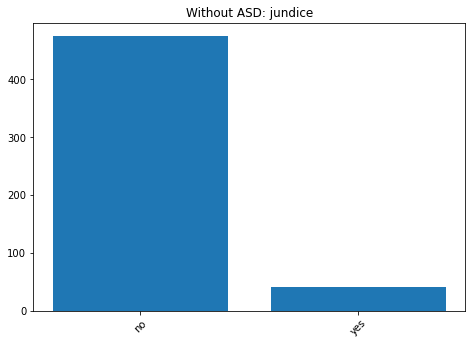

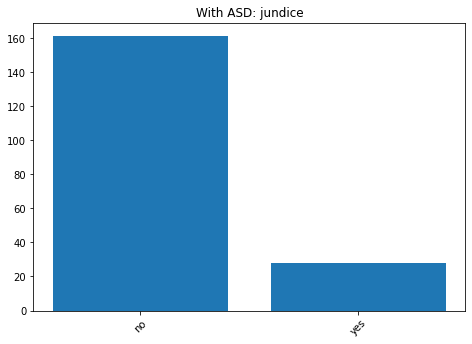

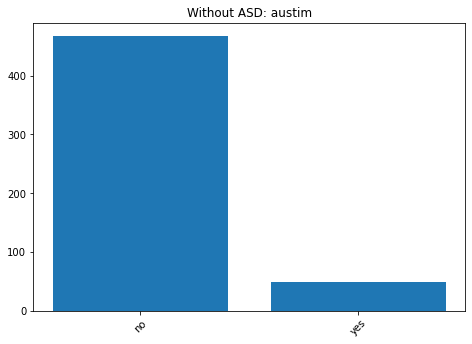

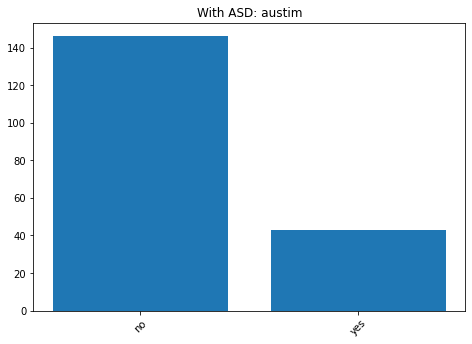

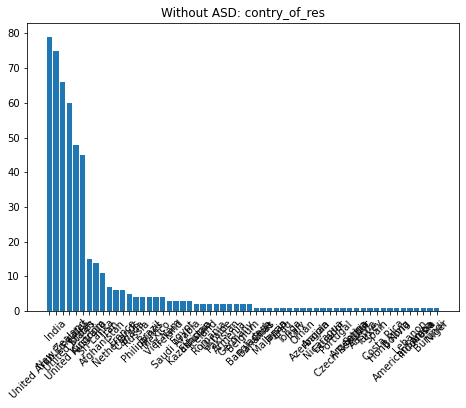

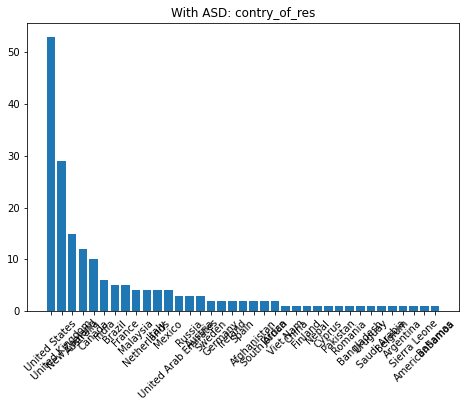

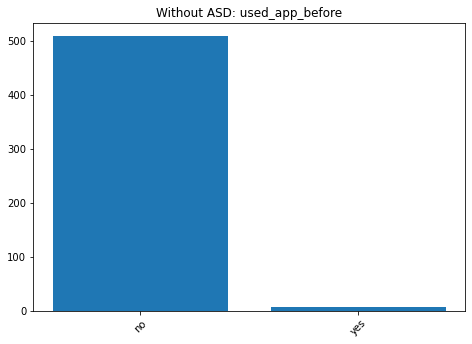

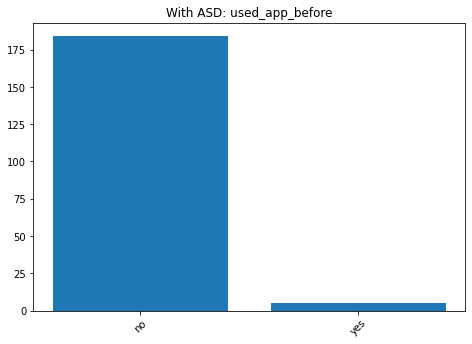

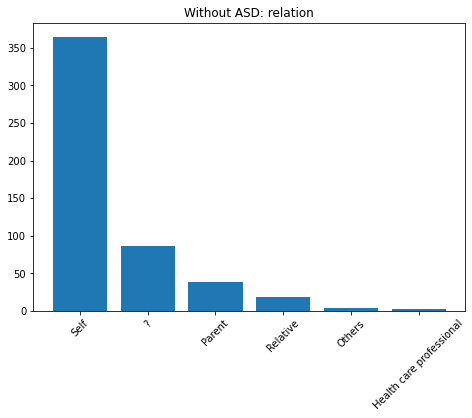

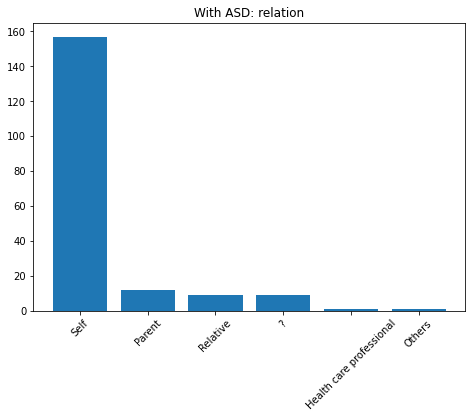

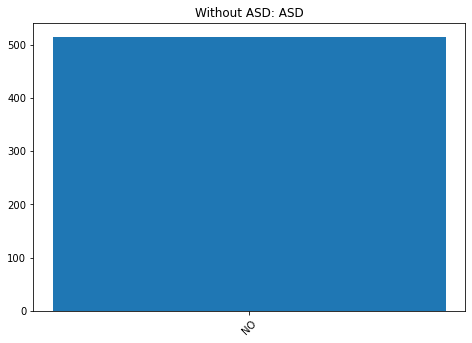

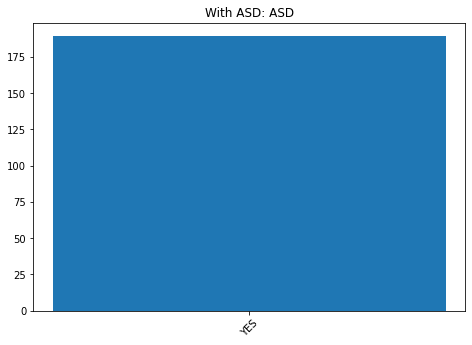

In [109]:
# Reload the datafile
df = pd.read_csv(r'C:\Users\HanSoul\Documents\analysis\datas\Autism_Adult_Data\Autism_Adult_Data.csv')


df_characters = df[['age',
                'gender', 
                'ethnicity', 
                'jundice', 
                'austim', 
                'contry_of_res',
                'used_app_before', 
                'relation',
                'Class/ASD']]
df_characters =df_characters.rename(columns = {'Class/ASD':'ASD'})
df_No = df_characters[(df_characters.ASD == 'NO')]
df_Yes = df_characters[(df_characters.ASD == 'YES')]

def binary_hist(feat):
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    df = df_No[feat]
    val = df.value_counts().reset_index()
    cols = val['index']
    counts = val[feat]

    ax.bar(cols, counts)
    ax.set_title("Without ASD: " + feat)
    plt.xticks(rotation = 45) 
    plt.show()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    df = df_Yes[feat]
    val = df.value_counts().reset_index()
    cols = val['index']
    counts = val[feat]

    ax.bar(cols, counts)
    ax.set_title("With ASD: " + feat)
    plt.xticks(rotation = 45) 
    plt.show()

col_name = df_characters.keys()
for i in col_name:
    binary_hist(i)         

# ####################Subjects without ASD

# df_No = df_characters[(df_characters.ASD == 'NO')]

# for i in col_name:
#     binary_hist(df_No, i, 'Without')         


# ####################Subjects with ASD

# df_Yes = df_characters[(df_characters.ASD == 'YES')]

# for i in col_name:
#     binary_hist(df_Yes, i, 'With')         
